In [4]:
import import_ipynb
import numpy as np
import sys
import csv
import numpy.ma as ma
import a2_extract_list_meetings as issues_e
import c1_extract_paragraphe_issue as p
import c2_extract_sentence_issue as s
import g1_generate_dictionary as dict_gen
import e2_extract_occ_original as e2 
import e1_extract_occ_gen as e1
import e2_extract_occ_original as original_issues
import matplotlib.pyplot as plt


importing Jupyter notebook from a2_extract_list_meetings.ipynb
importing Jupyter notebook from a1_compute_list_meeting.ipynb
importing Jupyter notebook from c1_extract_paragraphe_issue.ipynb
importing Jupyter notebook from c2_extract_sentence_issue.ipynb
importing Jupyter notebook from g1_generate_dictionary.ipynb
importing Jupyter notebook from e2_extract_occ_original.ipynb
importing Jupyter notebook from e1_extract_occ_gen.ipynb


In [5]:
def open_file(file):
    list_file = []
    f = open(file)
    for x in csv.reader(f):
        list_file.append(x)
    
    return list_file[1:]

In [6]:
def extract_stat_orig(dictionary,orig_occ):
    stat_original = []
    for o in orig_occ:
        if(len(dictionary[o[0]]) !=0 ):
            stat_original.append((o[0],o[1]))
    return stat_original

In [7]:
def extract_stat_gen(dictionary, gen_occ):
    stat_g = []
    for o in gen_occ:
        if(o[0] in sum(dictionary.values(),[])):
            stat_g.append((o[0],o[1]))
    return stat_g

In [8]:
def combine_gen(dictionary, original_occ, generated_occ):
    combined = []

    for eo in original_occ:
        list_eo = []
        for eg in generated_occ:
            if(eg[0] in dictionary[eo[0]]):
                list_eo.append(eg)
        combined.append(list_eo)
    return combined

In [9]:
def write_occurrence_issue(occurences_meetings, s):
        with open(s, "w", newline='') as file:
                writer = csv.writer(file)
        #header
                writer.writerow(('entity','interventions'))
                writer.writerows(occurences_meetings)

In [10]:
def create_stat_egals(generated_occ, original_occ,number):
    original = []
    generated = []
    for i in range(len(original_occ)):
        original.append((number,original_occ[i][0],original_occ[i][1]))
        g = sorted(generated_occ[i],key=lambda x: x[1], reverse=True)[0]
        generated.append((number,g[0],g[1]))
    return original,generated 

In [11]:
def extract_interventions(number, list_sentences):
    
    #Load the occurences for the original and generated file, and the dictionary
    original_occ = e2.extract_occurences_issue(number)
    gen_occ = e1.extract_occurences_issue_ENB(list_sentences)

    dictionary = dict_gen.compute_dictionary()
    #write_occurrence_issue(gen_occ,str(number))
    #Take only entities in the dictionary (to have same length)
    original_occ = extract_stat_orig(dictionary,original_occ)

    generated_occ = extract_stat_gen(dictionary, gen_occ)

    
    #Combine element same key
    generated_occ= combine_gen(dictionary, original_occ, generated_occ)

    original,generated = create_stat_egals(generated_occ, original_occ, number)

    return original,generated 

In [12]:
def find_issues_to_extract():
    lines = original_issues.extract_statement_count()
    set_issue = set()
    for l in lines[1:]:
        set_issue.add(int(l[2]))
    return list(set_issue)

In [13]:
def find_intervention():
    # Extract all the issue number in the original dataset
    list_issues = np.sort(find_issues_to_extract())
    list_generated = []
    list_original = []
    #list_test = [171,190,396,460,557,568]
    for i in list_issues:
        if(45 < i ):
            list_paragraphes = p.extract_paragraphes_from_issue(i)
            list_sentences = s.sentences(list_paragraphes)
            original,generated = extract_interventions(i, list_sentences)
            list_generated += generated
            list_original += original
    write_occurrence_issue(list_generated,"occurences_generated.csv")
    write_occurrence_issue(list_original,"occurences_original.csv")
    

In [11]:
find_intervention()

Issue  46
Issue  47
Issue  48
Issue  49
Issue  50
Issue  51
Issue  52
Issue  53
Issue  54
Issue  57
Issue  58
Issue  59
Issue  60
Issue  61
Issue  62
Issue  63
Issue  64
Issue  65
Issue  67
Issue  68
Issue  69
Issue  70
Issue  71
Issue  72
Issue  73
Issue  74
Issue  75
Issue  78
Issue  79
Issue  80
Issue  81
Issue  82
Issue  83
Issue  84
Issue  85
Issue  88
Issue  89
Issue  90
Issue  91
Issue  92
Issue  93
Issue  94
Issue  95
Issue  96
Issue  98
Issue  100
Issue  101
Issue  102
Issue  103
Issue  104
Issue  105
Issue  106
Issue  107
Issue  108
Issue  109
Issue  111
Issue  113
Issue  114
Issue  115
Issue  116
Issue  117
Issue  118
Issue  119
Issue  120
Issue  121
Issue  122
Issue  124
Issue  125
Issue  126
Issue  128
Issue  129
Issue  130
Issue  131
Issue  132
Issue  133
Issue  134
Issue  135
Issue  136
Issue  138
Issue  139
Issue  140
Issue  142
Issue  143
Issue  144
Issue  145
Issue  146
Issue  147
Issue  148
Issue  149
Issue  150
Issue  153
Issue  154
Issue  155
Issue  156
Issue  157


In [14]:
def find_intervention_switzerland():
    # Open file with occurence generated
    generated_occ = open_file("occurences_generated.csv")
    interventions_s = []
    interventions_c = []
    interventions_u = []

    for i in range(len(generated_occ)):
        
        if(generated_occ[i][1] == 'SWITZERLAND' or generated_occ[i][1] == 'SWITERLAND' or generated_occ[i][1] == 'SWITER'):
            interventions_s.append(generated_occ[i][2])
        if(generated_occ[i][1] == 'CHINA'):
            interventions_c.append(generated_occ[i][2])
        if(generated_occ[i][1] == 'US' or generated_occ[i][1] == 'UNITED STATES'):
            interventions_u.append(generated_occ[i][2])
    return interventions_s, interventions_c, interventions_u   

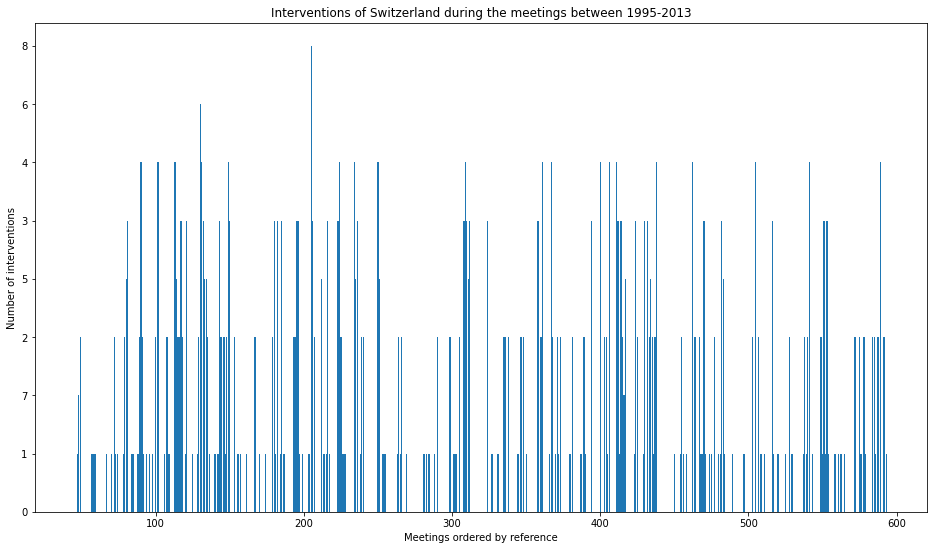

In [26]:
swiss, china, us = find_intervention_switzerland()
figsize = (16,9)
list_issues = np.sort(find_issues_to_extract())[37:]
fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.set_title('Interventions of Switzerland during the meetings between 1995-2013')
ax.set_xlabel('Meetings ordered by reference')
ax.set_ylabel('Number of interventions')
plt.bar(list_issues,swiss)
plt.show()
